# PD5- generowanie krzywych PDP dla 4 wybranych istotnych zmiennych



In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import pickle

from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

from matplotlib.pyplot import *

from sklearn.inspection import plot_partial_dependence
from operator import itemgetter

from itertools import chain

## Loading data

In [14]:
X = np.load("X48.npy")
with open('y', 'rb') as f:
    labels = pickle.load(f)
task = [yy[0] for yy in labels]
y = np.array(task)
with open('X48_cols', 'rb') as f:
    task = pickle.load(f)
X_colnames = np.array(task)

X_pd = pd.DataFrame(X, columns=X_colnames)
X_pd

,min_albumin,min_bicarbonate,min_bun,min_calcium,min_creatinine,min_diasbp,min_glucose,min_heartrate,min_inr,min_lactate,...,std_lactate,std_pco2,std_ph,std_platelet,std_potassium,std_resprate,std_sodium,std_spo2,std_sysbp,std_tempc
0,0.042254,0.000000,0.054348,0.189250,0.000000,0.000000,0.175926,0.000000,0.356164,0.313953,...,1.582644e-01,0.147305,0.000000,0.391617,4.766572e-02,0.131317,3.046604e-01,4.030170e-01,0.133953,0.475068
1,0.258216,0.118421,0.326087,0.142277,0.375000,0.000000,0.061728,0.346154,0.041096,0.000000,...,7.744816e-02,0.155826,0.165304,0.120996,1.824009e-01,0.000000,3.055899e-15,4.109586e-14,0.000000,0.000000
2,0.211268,0.405554,0.086957,0.121952,0.000000,0.617716,0.061728,0.423077,0.075342,0.116279,...,7.460038e-01,0.471608,0.397899,0.193799,2.526472e-01,0.208059,1.733271e-01,2.522076e-01,0.188907,0.231846
3,0.197183,0.197368,0.282609,0.000000,0.125000,0.375000,0.061728,0.846154,0.075342,0.116279,...,1.688253e-01,0.203005,0.177606,0.071751,1.425275e-01,0.451884,4.548435e-01,1.057679e-01,0.091794,0.099409
4,0.126761,0.039474,0.000000,0.243903,0.125000,0.125000,0.061728,0.846154,0.075342,0.069767,...,1.504740e-02,0.052628,0.045043,0.035967,7.825885e-02,0.000000,3.055899e-15,4.109586e-14,0.000000,0.000000
5,0.140845,0.131579,0.326087,0.000000,0.000000,0.250000,0.000000,0.846154,0.075342,0.116279,...,1.267629e-01,0.362880,0.594402,0.618467,2.107709e-01,0.243708,4.674512e-01,7.684587e-01,0.272210,0.770378
6,0.000000,0.013158,0.282609,0.101625,0.000000,0.250000,0.006173,0.769231,0.075342,0.023256,...,4.921474e-02,0.086759,0.189381,0.341101,2.061241e-01,0.327920,4.153137e-01,3.142615e-01,0.275692,0.000000
7,0.014085,0.000000,0.000000,0.138581,0.000000,0.250000,0.000000,0.846154,0.041096,0.058140,...,5.387141e-02,0.160667,0.171116,0.155247,1.687936e-02,0.226359,3.135915e-01,3.823348e-01,0.321080,0.061109
8,0.422535,0.381579,0.608696,0.345529,0.187500,0.250000,0.126886,0.846154,0.054795,0.116279,...,3.856751e-02,0.173011,0.091023,0.145969,1.243520e-01,0.000000,3.055899e-15,4.109586e-14,0.000000,0.000000
9,0.211268,0.394737,0.000000,0.345529,0.250000,0.500000,0.061728,0.846154,0.075342,0.116279,...,7.630226e-02,0.129555,0.187462,0.197679,1.441627e-01,0.000000,1.676759e-01,3.758187e-02,0.076814,0.040753


In [3]:
#to delete
import random
random.seed(123)

i = random.sample( range(27616), 100)
X = X_pd.iloc[i,]
y = y[i]

## Random grid search

In [27]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [58]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, 
                               verbose=1, random_state=42, n_jobs = -1, scoring = 'roc_auc')
rf_random.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [52]:
df = pd.DataFrame(rf_random.cv_results_)
df = df[["rank_test_score","mean_test_score","std_test_score",
    "param_n_estimators","param_min_samples_split","param_min_samples_leaf","param_max_features","param_max_depth","param_bootstrap"]]
df.sort_values( "rank_test_score",  inplace=True)

,rank_test_score,mean_test_score,std_test_score,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap
3,1,0.823718,0.125205,1400,5,1,sqrt,30,True
7,2,0.813553,0.137751,200,5,2,sqrt,10,True
5,3,0.813507,0.134853,400,10,1,sqrt,60,False
0,4,0.805495,0.138761,200,10,2,sqrt,50,True
9,5,0.803755,0.140025,2000,5,2,auto,50,True
1,6,0.802473,0.152553,600,10,4,sqrt,90,False
8,7,0.762363,0.168036,1200,2,4,auto,100,True
6,8,0.723478,0.165857,2000,2,2,auto,50,False
2,9,0.717159,0.167840,600,2,2,auto,60,False
4,10,0.698638,0.116574,1000,10,1,auto,80,False


In [70]:
#check point
df.to_csv("best_params.csv",index=False,sep=";")
#TO CHANGE
df = pd.read_csv("almighty_results.csv",sep=";")
df = df.where(pd.notnull(df), None)

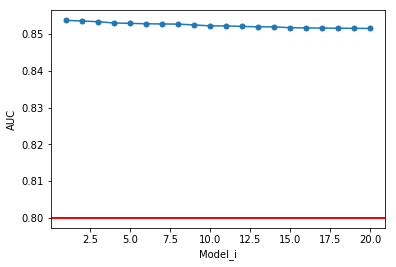

In [71]:
plot('rank_test_score', 'mean_test_score', data=df, marker='o', markersize=5)

xlabel("Model_i")
ylabel("AUC")

threshold = 0.8

plt.axhline(y=threshold, xmin=0, xmax=len(df), linewidth=2, color = 'red')

## Rashomon set

In [72]:
num_of_best = sum(df["mean_test_score"]>threshold)

#to delete
num_of_best=4

if num_of_best>10:
    num_of_best = 10

rashmomon_set = []
for i in range(num_of_best):
    model = RandomForestRegressor(n_estimators = df.loc[i,"param_n_estimators"],
                                  min_samples_split = df.loc[i,"param_min_samples_split"],
                                  min_samples_leaf = df.loc[i,"param_min_samples_leaf"],
                                  max_features = df.loc[i,"param_max_features"],
                                  max_depth = df.loc[i,"param_max_depth"],
                                  bootstrap = df.loc[i,"param_bootstrap"],
                                  verbose = 1, n_jobs = -1)
    rashmomon_set.append(model)

In [73]:
for model in rashmomon_set:
    model.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed:  3.5min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  6.2min finished
[Parall

## PDP charts

In [74]:
important_feacures = list()
for model in rashmomon_set:
    important_feacures.append(np.argsort( model.feature_importances_)[::-1][:3])
important_feacures = list(set(chain.from_iterable(important_feacures)))
X_colnames[important_feacures]

array(['mean_tempc', 'mean_ph', 'max_inr', 'mean_inr'], dtype='<U16')

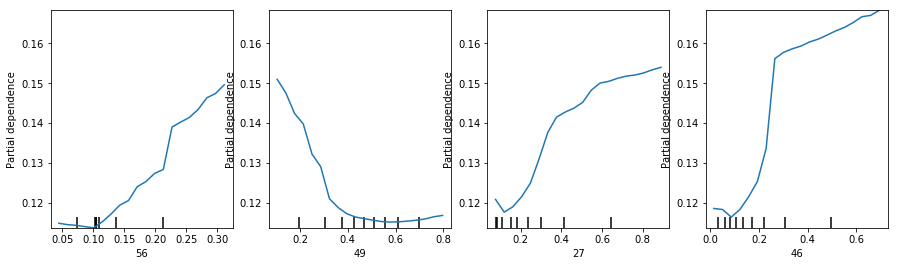

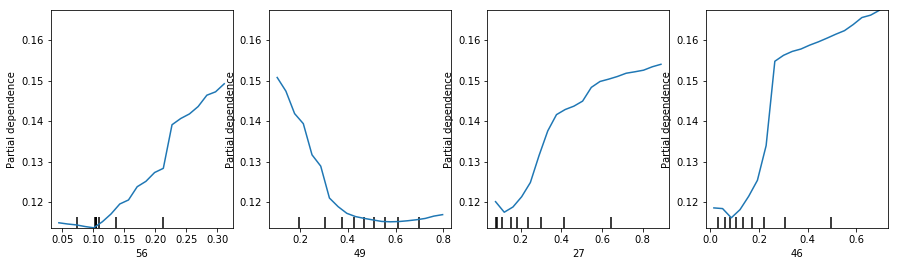

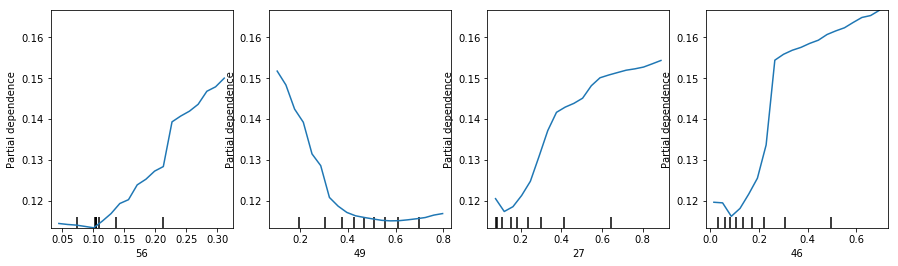

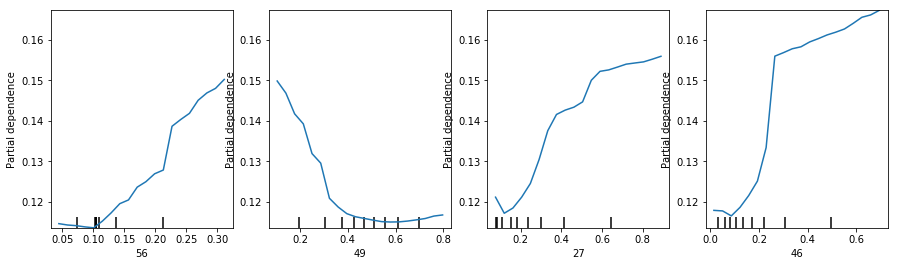

In [75]:
for model in rashmomon_set:
    _, ax = plt.subplots(ncols=len(important_feacures), figsize=(15, 4))
    display = plot_partial_dependence(model, X, important_feacures, n_jobs=-1, grid_resolution=20, ax=ax)

Wykresy PDP są dla odpowiednio zmiennych (w tej kolejności):
- mean_tempc
- mean_ph
- max_inr
- mean_inr

Porównując z istotnością zmiennych, ph było najmniej istotne oraz wykazywało wyróżniający się na tle innych zmiennych wykres PDP.